#### **Bài tập và Code Python Không Dùng Thư Viện**

#### **Bài 1: Viết tay KNN phân loại nhị phân**
#### Yêu cầu: Viết hàm dự đoán nhãn nhị phân dựa trên khoảng cách Euclidean

In [1]:
import math
from collections import Counter

def euclidean_distance(x1, x2):
    return math.sqrt(sum((t1 - t2)**2 for t1, t2 in zip(x1, x2)))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i, x_train in enumerate(X_train):
        distance = euclidean_distance(x_test, x_train)
        distances.append((distance, y_train[i]))
    sorted_distances = sorted(distances, key = lambda x: x[0])
    k_nearest_labels = [label for _, label in sorted_distances[:k]]
    vote_counts = Counter(k_nearest_labels)    # đếm số lần mỗi nhãn xuất hiện
    predicted_label = vote_counts.most_common(1) [0][0]  # trả về nhãn phổ biến nhất (danh sách có 1 phần tử). # [0][0]: lấy chính nhãn đó
    return predicted_label

# Test
X_train = [[1 , 2], [2, 3], [3, 1], [6, 5]]
y_train = [0, 0, 1, 1]
x_test = [2, 2]
print (" Predicted label :", knn_predict ( X_train , y_train , x_test , k=3))

 Predicted label : 0


#### **Bài 2: Viết KNN hồi quy (Regression)**
##### Thay vì bỏ phiếu nhãn (classification), hồi quy dùng trung bình giá trị (giá trị liên tục) của k láng giềng gần nhất để dự đoán giá trị đầu ra.


In [5]:
import math
def euclidean_distance(x1, x2):
    return math.sqrt(sum((t1 - t2)**2 for t1, t2 in zip(x1, x2)))

def knn_regression(X_train, y_train, x_test, k):
    distances = []
    for i, x_train in enumerate(X_train):
        distance = euclidean_distance(x_test, x_train)
        distances.append((distance, y_train[i]))

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_values = [value for _, value in sorted_distances[:k]]
    predicted_value = sum(k_nearest_values) / k
    return predicted_value

# TEST: Dự đoán giá nhà
X_train = [[100] , [150] , [200] , [250] , [300]]
y_train = [1.0 , 1.5 , 2.0 , 2.5 , 3.0]
x_test = [220]
print (" Predicted price :", knn_regression ( X_train , y_train , x_test , k =2))

 Predicted price : 2.25


### **Bài 3: Weighted Voting (có trọng số) KNN Hồi quy có trọng số**

#### Khoảng cách nhỏ → trọng số lớn → ảnh hưởng lớn hơn đến kết quả

#### Nếu có khoảng cách bằng 0, ta trả về luôn giá trị đó để tránh chia cho 0

#### Kỹ thuật này đặc biệt tốt nếu dữ liệu có nhiễu

##### 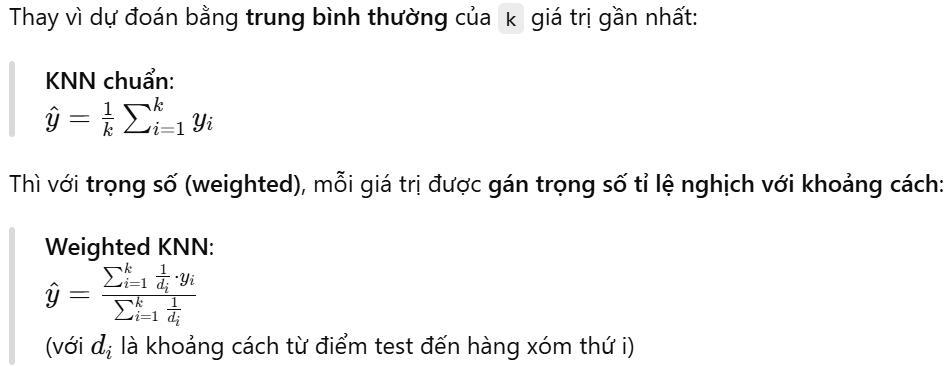

In [7]:
import math
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a-b)**2 for a,b in zip(p1, p2)))

def knn_weighted_regression(X_train, y_train, x_test, k):
    distances = []
    for i, x_train in enumerate(X_train):
        dist = euclidean_distance(x_test, x_train)
        distances.append((dist, y_train[i]))

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest = distances[:k]

    weighted_total = 0
    weight_total = 0

    for dist, value in k_nearest:
        if dist == 0:
            return value
        weight = 1/dist
        weighted_total += weight * value
        weight_total += weight
    return weighted_total / weight_total

# TEST
X_train = [[1], [2], [3], [4], [5]]
y_train = [100, 150, 200, 250, 300]

x_test = [2.5]
k = 3

predicted = knn_weighted_regression(X_train, y_train, x_test, k)

print(f"Dự đoán có trọng số cho {x_test} là: {predicted}")

Dự đoán có trọng số cho [2.5] là: 164.2857142857143
